# 第五章 简单统计推断

## 5.1 常用数据分析工具库

scipy在numpy基础上扩展了诸如积分计算、求解微分方程、优化、信号处理和稀疏矩阵等方便用户使用的数理算法和函数

In [293]:
from scipy import stats
import numpy as np
import pandas as pd

### 5.1.2 statsmodels

In [294]:
import statsmodels.api as sm  #导入模型接口statsmodels.api 并命名为sm

In [295]:
import sys
stdout=sys.stdout
stdin=sys.stdin
stderr=sys.stderr
reload(sys)
sys.stdout=stdout
sys.stdin=stdin
sys.stderr=stderr
sys.setdefaultencoding('utf-8')  #解决中文乱码和编码问题

### 5.1.3 sklearn

主要用于实现python中的机器学习功能，提供了一系列简单高效及最新的数据挖掘和数据分析工具

In [296]:
from sklearn import svm  #支持向量机进行分类

## 5.2 简单统计推断的基本原理

### 5.2.1 数据分布

数据分布是描述数据的一种形象方式，可分为离散分布和连续变量的分布。总体分布：已知总体往往是一个具有确定分布的随机变量，总体分布就是所有数据的分布
样本分布：在总体中抽取一些信息 抽样分布：是指样本统计量的分布

In [297]:
pop=np.array([2,4,6,8])  #总体数据
print pop.var(ddof=0)   #计算总体方差
print pop.mean()        #计算总体均值

5.0
5.0


In [298]:
miu=np.array([2,3,4,5,3,4,5,6,4,5,6,7,5,6,7,8])
#miu 为所有样本的均值数据，即均值的抽样分布
print miu.var(ddof=0)  #计算miu的样本方差
print miu.mean()       #计算miu的样本均值

2.5
5.0


## 5.3 单总体参数的估计及假设检验

#### 5.3.1.1 单总体的参数估计

In [299]:
path="D:/data/Python_data/ch5/moisture.csv"
moisture=pd.read_csv(path)
moisture.head()

,moisture
0,4.50
1,3.50
2,3.55
3,4.03
4,3.19


In [300]:
sm.stats.DescrStatsW(moisture['moisture']).zconfint_mean(alpha=0.5)  #对总体均值进行Z估计 得到正态估计区间

(3.933166071056396, 4.014033928943604)

In [301]:
sm.stats.DescrStatsW(moisture['moisture']).tconfint_mean(alpha=0.5)  #得到t分布的估计区间

(3.9328639422926144, 4.0143360577073866)

In [302]:
moisture_mean,moisture_var,moisture_std=stats.bayes_mvs(moisture['moisture'],alpha=0.95)  #scipy中的stats.bayes_mvs 函数也提供了采用t分布下的均值估计结果
moisture_mean

Mean(statistic=3.9736000000000002, minmax=(3.853131123764977, 4.094068876235023))

#### 5.3.1.2 单总体方差、标准差的参数估计

In [105]:
moisture_var  #总体方差

Variance(statistic=0.18733089361702127, minmax=(0.12538093683821308, 0.2790231439977582))

In [106]:
moisture_std  #总体标准差

Std_dev(statistic=0.43052145521911656, minmax=(0.35409170681931124, 0.5282264135744805))

In [107]:
m,v,s=stats.mvsdist(moisture['moisture'])
m.interval(0.95)  #返回95%置信度下总体均值的置信区间

(3.853131123764977, 4.094068876235023)

In [108]:
v.interval(0.95)  #返回95%置信度下总体方差的置信区间

(0.12538093683821308, 0.2790231439977582)

In [109]:
s.interval(0.95)  #返回95%置信度下总体标准差的置信区间

(0.35409170681931124, 0.5282264135744805)

In [110]:
m.std()  #得到均值的估计标准误差

0.061209622383579736

#### 5.3.1.3 单总体比例的参数估计

反映总体某种特征的变量只有2种属性，其中某种属性占有的属性的比重或百分比

In [111]:
sm.stats.proportion_confint(95,100,alpha=0.01,method='binom_test')
#第一个参数表示关注“成功”的数目，第二个参数表示样本量 methon参数可根据抽样分布选择

(0.8649789068448047, 0.987031078672979)

### 5.3.2 单总体参数的假设检验

#### 5.3.2.1 总体均值的假设检验

In [112]:
sm.stats.DescrStatsW(moisture['moisture']).ztest_mean(value=4,alternative='larger')
#alternative 表示备择假设的符号，缺省则表示默认符号为等号，larger和smaller分别表示备择假设符号为大于或小于

(-0.440385831166995, 0.6701711574008213)

In [113]:
path="D:/data/Python_data/ch5/mobile.csv"
mobile=pd.read_csv(path)
mobile.head()

,csi
0,76
1,84
2,86
3,90
4,84


In [114]:
sm.stats.DescrStatsW(mobile['csi']).ttest_mean(value=82,alternative='larger')
# alternative 表示备择假设的符号，缺省则表示默认符号为等号，larger和smaller分别表示备择假设符号为大于或小于

(-0.6859943405700328, 0.7503546857532633, 24.0)

In [115]:
stats.ttest_1samp(a=mobile['csi'],popmean=82)  #ttest_1samp 用于t检验
#参数popmean用于指定原假设取等号时的值

Ttest_1sampResult(statistic=-0.6859943405700328, pvalue=0.4992906284934734)

#### 5.3.2.2 总体比例的假设检验

总体比例的假设检验是根据样本数据，对总体具备某种属性的个题总数占全体属性总数的比例，提出假设并进行检验的过程

In [116]:
stats.binom_test(95,100,p=0.97,alternative='greater')  #binom_test 函数可以对单总体比例进行检验
#alternative 参数分别可取two-sided less greater

0.9191628710986264

In [117]:
sm.stats.binom_test(95,100,prop=0.97,alternative='larger')  # 使用binom_test 和proportion_ztest 函数 对总体比例进行假设检验

0.9191628710986264

In [118]:
sm.stats.proportions_ztest(95,100,value=0.97,alternative='larger')

(-0.9176629354822475, 0.8206023210565294)

本例检验的单侧p值=0.919>>0.05 proportions_ztest 正态检验p值为0.8206 >> 0.05 因此，没有充分证据表明应该拒绝原假设，即没有充分理由否定产品合格率不超过97%

## 5.4 两总体参数的假设检验

参数估计和假设检验的问题也可以扩展至两个总体的情形，主要考察两个总体的参数是否有差异

### 5.4.1 独立样本的假设检验

所谓独立样本即两组样本数据是相互独立，一个样本数据特征的变动不会影响另一个样本数据特征的变动

#### 5.4.1.1 独立样本均值之差的假设检验

独立样本均值之差的假设检验主要考察两个总体的均值是否有差异或检验其差异的具体数值，一般家丁两个总体均服从正态分布，使用t统计量进行检验

In [119]:
path="D:/data/Python_data/ch5/battery.csv"
battery=pd.read_csv(path)
battery.head()

,Endurance,tech
0,4.1,1
1,3.7,1
2,3.5,1
3,3.9,1
4,4.1,1


In [120]:
stats.bartlett(battery[battery['tech']==1]['Endurance'],battery[battery['tech']==2]['Endurance'])  #对样本总体方差是否相等进行检验

BartlettResult(statistic=3.3228777945188592, pvalue=0.06832213694213818)

In [121]:
stats.levene(battery[battery['tech']==1]['Endurance'],battery[battery['tech']==2]['Endurance'])

LeveneResult(statistic=1.543714821763612, pvalue=0.21833338426451232)

In [122]:
stats.ttest_ind(battery[battery['tech']==1]['Endurance'],battery[battery['tech']==2]['Endurance'],equal_var=True)

Ttest_indResult(statistic=-2.9908265619140626, pvalue=0.0038722567339729993)

In [123]:
stats.ttest_ind_from_stats(3.7257,0.2994,35,3.9829,0.4112,35)

Ttest_indResult(statistic=-2.991473205108904, pvalue=0.0038650297570098266)

In [124]:
sm.stats.ttest_ind(battery[battery['tech']==1]['Endurance'],battery[battery['tech']==2]['Endurance'],alternative='two-sided',usevar='pooled',value=0)
#usevar参数pooled，unequal 用于指定参数总体方差是否相等

(-2.9908265619140626, 0.0038722567339729993, 68.0)

ttest_ind方法还可以对总体均值的差值进行假设检验

In [125]:
sm.stats.ttest_ind(battery[battery['tech']==1]['Endurance'],battery[battery['tech']==2]['Endurance'],alternative='smaller',usevar='pooled',value=0.1)

(-4.1539257804361975, 4.6666126944336435e-05, 68.0)

#### 5.4.1.2 独立样本比例之差的假设检验

独立样本比例只差的假设检验主要考察两个总体比例是否有差异或检验其差异的具体数值

In [126]:
path="D:/data/Python_data/ch5/magzine.csv"
magzine=pd.read_csv(path)
magzine.head()

,name,gender
0,1,1
1,1,2
2,1,1
3,1,1
4,1,1


In [127]:
magzine['name']=magzine['name'].astype('category')          #为name gender变量挂上值标签便于分析结果的阅读
magzine['name'].cat.categories=['Fashion','Cosmetic'] 
magzine['name'].cat.set_categories=['Fashion','Cosmetic']

magzine['gender']=magzine['gender'].astype('category')
magzine['gender'].cat.categories=['Male','Female']
magzine['gender'].cat.set_categories=['Male','Female']

In [128]:
female=magzine[magzine['gender']=='Female']['name'].value_counts()  #统计女性阅读人数
female

Cosmetic    35
Fashion     16
Name: name, dtype: int64

In [129]:
magzines=magzine['name'].value_counts()  #两个杂志的总人数
magzines

Cosmetic    46
Fashion     34
Name: name, dtype: int64

In [130]:
sm.stats.proportions_ztest(np.array(female),np.array(magzines),value=0.3,alternative='smaller',prop_var=False)  
#第一个参数和第二个参数分别制定“成功”的数目和样本量 如果是array 则表示每一个样本的上述两个值，此时value表示样本量差值的假设值

(-0.0893894201435671, 0.4643862156571413)

### 5.4.2 成对样本的假设检验

In [131]:
path="D:/data/Python_data/ch5/happiness.csv"
happiness=pd.read_csv(path)
happiness.head()

,Year2015,Year2016
0,69.48,77.44
1,82.51,67.49
2,82.12,64.56
3,70.32,70.14
4,75.29,74.72


In [132]:
stats.ttest_rel(happiness['Year2015'],happiness['Year2016'])  #ttest_rel 函数可以直接对此种类型的数据进行检验
#Ttest_re1Result(statistic=-0.45945807951277384,pvalues=0.64640676635551686)

Ttest_relResult(statistic=-0.45945807951277384, pvalue=0.6464067663555169)

In [133]:
sm.stats.ttost_paired(happiness['Year2015'],happiness['Year2016'],-0,0)  #该函数提供两个样本均值之差的上下界
#ttost_paired 函数可以直接得到两侧和单侧检验的结果

(0.6767966168222417,
 (-0.45945807951277423, 0.6767966168222417, 199.0),
 (-0.45945807951277423, 0.32320338317775826, 199.0))

# 第六章 方差分析

## 6.1 方差分析的基本原理

方差分析主要是通过方差比较的方式来对不同总体参数进行假设检验

In [134]:
path="D:/data/Python_data/ch6/dc_sales.csv"
dc_sales=pd.read_csv(path)
dc_sales.head()

,market,pixel,sales
0,1,1,70
1,1,2,101
2,1,3,114
3,1,4,120
4,1,5,132


In [135]:
dc_sales['pixel']=dc_sales['pixel'].astype('category')  #将market和pixel变量转化为分类变量并为其值挂上标签
dc_sales['pixel'].cat.categories=['500万像素及以下','500-600万像素','600-800万像素','800-1000万像素','1000万像素及以上']
dc_sales['pixel'].cat.set_categories=['500万像素及以下','500-600万像素','600-800万像素','800-1000万像素','1000万像素及以上']

In [136]:
pd.pivot_table(dc_sales,index=['pixel'],columns=['market'],values=['sales'],aggfunc='sum')  #展示各变量之间的关系

sales                                   
market          1    2    3    4    5    6    7    8
pixel                                               
500万像素及以下      70   67   82   87   80   80   87   96
500-600万像素    101   76   97   88   92   99  123   90
600-800万像素    114   96  128  103  107   91   99  119
800-1000万像素   120   98  132  128  132  132  131  119
1000万像素及以上    132  102  123  119  123  135  126  117

## 6.2 一元方差分析

当所研究的因变量只有一个时的方差分析就是一元方差分析

### 6.2.1 一元单因素方差分析

一元单因素方差分析主要研究单独一个因素对因变量的影响，通过因素的不同水平对因变量进行分组，计算组间和组内方差，利用方差比较的方法对各分组所形成的总体进行均值比较，从而对个总体均值相等的原假设进行检验

In [137]:
G=dc_sales['pixel'].unique()  #G用于统计变量 pixel像素属性
args=[]  # 列表args用于存储不同像素属性下的销售数据
for i in list(G):
    args.append(dc_sales[dc_sales['pixel']==i]['sales'])

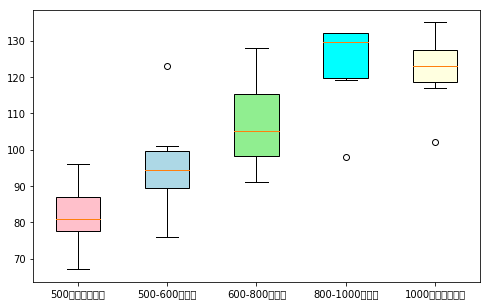

In [138]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

dc_sales_plot=plt.boxplot(args,vert=True,patch_artist=True)
colors=['pink','lightblue','lightgreen','cyan','lightyellow']
for patch,color in zip(dc_sales_plot['boxes'],colors):
    patch.set_facecolor(color)
fig=plt.gcf()
fig.set_size_inches(8,5)
combinebox=plt.subplot(111)
combinebox.set_xticklabels(G)  #存在中文乱码
plt.show()

#### 6.2.1.1 方差同质性检验

一元单因素方差分析应当满足方差齐性假设，因此需要对其进行方差同质性检验，该检验原假设是不同水平所代表总体的方差时相同的，对于一元方差分析常用 lvevne's检验 多元方差分析使用Bartlett's


In [139]:
stats.levene(*args)

LeveneResult(statistic=0.233384556281214, pvalue=0.9176929576341715)

#### 6.2.1.2 方差来源分解及检验过程

In [140]:
stats.f_oneway(*args)

F_onewayResult(statistic=19.57176228742291, pvalue=1.5491302153222814e-08)

F统计量为19.57 p值接近0 可认为像素数对数码相机销量非常显著

In [141]:
from statsmodels.formula.api import ols
dc_sales_anova=sm.stats.anova_lm(ols('sales~C(pixel)',dc_sales).fit())
print dc_sales_anova
'''
ols 第一个参数表示模型，第二个参数用于指定所分析的数据 其fit方法表示对模型进行拟合或估计
'''

            df     sum_sq    mean_sq          F        PR(>F)
C(pixel)   4.0  10472.850  2618.2125  19.571762  1.549130e-08
Residual  35.0   4682.125   133.7750        NaN           NaN


'\nols \xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\xe5\x8f\x82\xe6\x95\xb0\xe8\xa1\xa8\xe7\xa4\xba\xe6\xa8\xa1\xe5\x9e\x8b\xef\xbc\x8c\xe7\xac\xac\xe4\xba\x8c\xe4\xb8\xaa\xe5\x8f\x82\xe6\x95\xb0\xe7\x94\xa8\xe4\xba\x8e\xe6\x8c\x87\xe5\xae\x9a\xe6\x89\x80\xe5\x88\x86\xe6\x9e\x90\xe7\x9a\x84\xe6\x95\xb0\xe6\x8d\xae \xe5\x85\xb6fit\xe6\x96\xb9\xe6\xb3\x95\xe8\xa1\xa8\xe7\xa4\xba\xe5\xaf\xb9\xe6\xa8\xa1\xe5\x9e\x8b\xe8\xbf\x9b\xe8\xa1\x8c\xe6\x8b\x9f\xe5\x90\x88\xe6\x88\x96\xe4\xbc\xb0\xe8\xae\xa1\n'

#### 6.2.1.3 多重比较检验

进一步研究是因素的哪一个水平对观察变量产生了显著影响，即具体那种像素数目对销售量有显著影响

In [142]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
dc_sales_anova_post=pairwise_tukeyhsd(dc_sales['sales'],dc_sales['pixel'],alpha=0.05)
dc_sales_anova_post.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

#### 6.2.1.4 方差分析模型的参数估计和预测

In [143]:
formula='sales~C(pixel)'
dc_sales_est=ols(formula,dc_sales).fit()  #dc_sales_est 是一个模型对象
print dc_sales_est.summary2()             # 对象模型可以使用summary summary2等属性和方法查看估计和检验结果

                          Results: Ordinary least squares
Model:                     OLS                   Adj. R-squared:          0.656   
Dependent Variable:        sales                 AIC:                     314.0202
Date:                      2018-06-03 20:08      BIC:                     322.4646
No. Observations:          40                    Log-Likelihood:          -152.01 
Df Model:                  4                     F-statistic:             19.57   
Df Residuals:              35                    Prob (F-statistic):      1.55e-08
R-squared:                 0.691                 Scale:                   133.78  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------
Intercept                          81.1250   4.0892 19.8387 0.0000 72.8234 89.4266
C(pixel)[T.500-600万像素]       

In [144]:
formula='sales~C(pixel)-1'
dc_sales_est1=ols(formula,dc_sales).fit()
print dc_sales_est1.summary2()

                          Results: Ordinary least squares
Model:                    OLS                    Adj. R-squared:           0.656   
Dependent Variable:       sales                  AIC:                      314.0202
Date:                     2018-06-03 20:08       BIC:                      322.4646
No. Observations:         40                     Log-Likelihood:           -152.01 
Df Model:                 4                      F-statistic:              19.57   
Df Residuals:             35                     Prob (F-statistic):       1.55e-08
R-squared:                0.691                  Scale:                    133.78  
-----------------------------------------------------------------------------------
                                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------------------------
C(pixel)[500万像素及以下]   81.1250   4.0892 19.8387 0.0000  72.8234  89.4266
C(pixel)[500-600万像素]        95

#### 6.2.1.5 方差分析模型的预测

对statsmodels 模型对象使用fittedvalues 属性就可以直接依据模型参数估计结果对因变量进行预测

In [145]:
dc_sales_est.fittedvalues

0      81.125
1      95.750
2     107.125
3     124.000
4     122.125
5      81.125
6      95.750
7     107.125
8     124.000
9     122.125
10     81.125
11     95.750
12    107.125
13    124.000
14    122.125
15     81.125
16     95.750
17    107.125
18    124.000
19    122.125
20     81.125
21     95.750
22    107.125
23    124.000
24    122.125
25     81.125
26     95.750
27    107.125
28    124.000
29    122.125
30     81.125
31     95.750
32    107.125
33    124.000
34    122.125
35     81.125
36     95.750
37    107.125
38    124.000
39    122.125
dtype: float64

In [146]:
dc_sales_influence=dc_sales_est.get_influence()  #也可以使用模型对象的get_influence 方法得到更详细的预测信息
print dc_sales_influence.summary_table()

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0     70.000     81.125      0.030     -1.028      0.125     -0.389     -1.029     -0.389
         1    101.000     95.750      0.007      0.485      0.125      0.183      0.480      0.181
         2    114.000    107.125      0.012      0.635      0.125      0.240      0.630      0.238
         3    120.000    124.000      0.004     -0.370      0.125     -0.140     -0.365     -0.138
         4    132.000    122.125      0.024      0.913      0.125      0.345      0.911      0.344
         5     67.000     81.125      0.049     -1.306      0.125     -0.493     -1.319     -0.499
         6     76.000     95.750      0.095     -1.825      0.125     -0.690     -1.892     -0.715
         7

### 6.2.2 一元多因素方差分析

当有两个或者两个以上的因素对因变量产生影响时，可以用多因素方差分析的方法来进行分析

#### 6.2.2.1 只考虑主效应的多因素方差分析

只考虑主效应的多因素方差分析模型中，只有因素自身对因变量的独立影像，不含任何交互作用对因变量的影响

In [147]:
path="D:/data/Python_data/ch6/house.csv"
house=pd.read_csv(path)
house.head()

,education,unit,income,type,space
0,1,3,2,2,75.0
1,1,5,1,6,55.0
2,3,1,2,8,56.0
3,2,6,2,4,51.0
4,2,4,1,5,60.0


In [148]:
house['education']=house['education'].astype('category')
house['education'].cat.categories=['初中及以下','高中（中专）','大学','研究生及以上']
house['education'].cat.set_categories=['初中及以下','高中（中专）','大学','研究生及以上']

house['unit']=house['unit'].astype('category')
house['unit'].cat.categories=['国营企业','行政事业单位','大专院校科研单位','私营企业','失业','其它']
house['unit'].cat.set_categories=['国营企业','行政事业单位','大专院校科研单位','私营企业','失业','其它']

house['income']=house['income'].astype('category')
house['income'].cat.categories=['10000以下','10000-25000','25000-50000','50000-75000','75000以上']
house['income'].cat.set_categories=['10000以下','10000-25000','25000-50000','50000-75000','75000以上']

house['type']=house['type'].astype('category')
house['type'].cat.categories=['一室一厅','二室一厅','二室二厅','三室一厅','三室二厅','三室三厅','四室二厅一卫','四室二厅二卫','四室三厅一卫','四室三厅二卫','更大户型']
house['type'].cat.set_categories=['一室一厅','二室一厅','二室二厅','三室一厅','三室二厅','三室三厅','四室二厅一卫','四室二厅二卫','四室三厅一卫','四室三厅二卫','更大户型']

In [149]:
formula='space~C(education)+C(unit)+C(income)+C(type)'# 考虑各因素对因变量的影响只有主效应没有交互效应的情况下可使用anova_lm 配合ols使用
house_anova=sm.stats.anova_lm(ols(formula,data=house).fit(),type=3)
print house_anova

                 df         sum_sq      mean_sq          F        PR(>F)
C(education)    3.0    6619.039028  2206.346343   6.904565  1.490355e-04
C(unit)         5.0    1171.976085   234.395217   0.733519  5.985995e-01
C(income)       4.0   15387.902934  3846.975734  12.038770  2.653195e-09
C(type)        10.0    9604.428837   960.442884   3.005621  1.093296e-03
Residual      449.0  143477.460152   319.548909        NaN           NaN


In [150]:
formula='space~C(income)+C(type)'
house_anova=sm.stats.anova_lm(ols(formula,data=house).fit(),type=3)
print house_anova

              df         sum_sq      mean_sq          F        PR(>F)
C(income)    4.0   19655.107559  4913.776890  15.375296  8.304020e-12
C(type)     10.0   10553.485226  1055.348523   3.302204  3.765261e-04
Residual   457.0  146052.214252   319.589090        NaN           NaN


In [151]:
#house_anova_post=pairwise_tukeyhsd(house['space'],house['income'],alpha=0.05)
#house_anova_post.summary()  #

In [152]:
house_anova_est=ols(formula,data=house).fit()
print house_anova_est.summary2()

                         Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.146    
Dependent Variable:       space                AIC:                    4076.2755
Date:                     2018-06-03 20:08     BIC:                    4138.6302
No. Observations:         472                  Log-Likelihood:         -2023.1  
Df Model:                 14                   F-statistic:            6.752    
Df Residuals:             457                  Prob (F-statistic):     1.38e-12 
R-squared:                0.171                Scale:                  319.59   
--------------------------------------------------------------------------------
                               Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
--------------------------------------------------------------------------------
Intercept                      86.1464   9.0005  9.5713 0.0000  68.4589 103.8339
C(income)[T.10000-25000]        4.2072   2.1086  1.9

#### 6.2.2.2 存在交互效应的多因素方差分析

In [153]:
formula='space~C(income)*C(type)'  #方差分析
house_anova_inter=sm.stats.anova_lm(ols(formula,data=house).fit())
print house_anova_inter

                      df         sum_sq      mean_sq          F        PR(>F)
C(income)            4.0   19655.107559  4913.776890  16.629186  1.077135e-12
C(type)             10.0   10553.485226  1055.348523   3.571507  1.438294e-04
C(income):C(type)   40.0   19729.421811   493.235545   1.669206  7.857478e-03
Residual           436.0  128834.132740   295.491130        NaN           NaN


In [154]:
ols(formula,data=house).fit().rsquared

0.26907101524187094

[Text(0,0,u'10000-25000'),
 Text(0,0,u'10000\u4ee5\u4e0b'),
 Text(0,0,u'25000-50000'),
 Text(0,0,u'50000-75000'),
 Text(0,0,u'75000\u4ee5\u4e0a')]

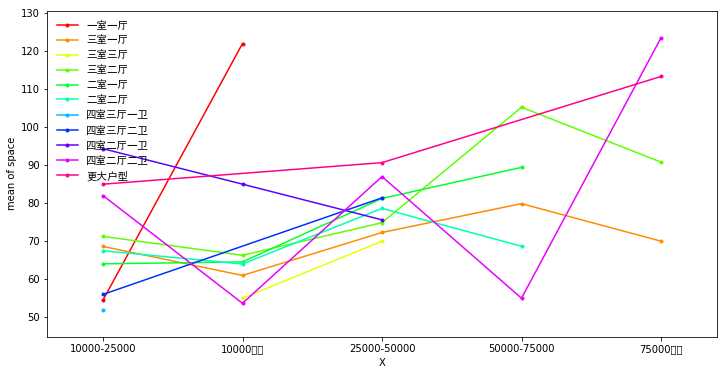

In [155]:
from statsmodels.graphics.api import interaction_plot
plt.figure(figsize=(12,6))
fig=interaction_plot(np.array(house['income']),np.array(house['type']),house['space'],ax=plt.gca())
fig_adj=plt.subplot(111)
plt.legend(prop={'family':'simhei','size':10.5},loc='upper left',frameon=False)
fig_adj.set_xticklabels(house['income'].unique())

## 6.3 协方差分析

In [156]:
path="D:/data/Python_data/ch6/sale_points.csv"
sale_points=pd.read_csv(path)
sale_points.head()

,market,warranty,sales,points
0,1,1,26.0,1.8
1,1,1,22.0,1.1
2,1,1,21.8,0.9
3,1,1,33.1,2.2
4,2,1,22.0,2.0


In [157]:
sale_points['market']=sale_points['market'].astype('category')
sale_points['market'].cat.categories=['market 1','market 2','market 3']
sale_points['market'].cat.set_categories=['market 1','market 2','market 3']

sale_points['warranty']=sale_points['warranty'].astype('category')
sale_points['warranty'].cat.categories=['1 year','3 years']
sale_points['warranty'].cat.set_categories=['1 year','3 years']

In [158]:
formula='sales~points+C(market)*C(warranty)'
sale_points_anovacov=sm.stats.anova_lm(ols(formula,data=sale_points).fit())
print sale_points_anovacov

                         df      sum_sq     mean_sq          F        PR(>F)
C(market)               2.0  593.160833  296.580417  56.984051  2.903413e-08
C(warranty)             1.0  512.450417  512.450417  98.460650  1.734504e-08
C(market):C(warranty)   2.0  167.155833   83.577917  16.058404  1.211601e-04
points                  1.0  196.523934  196.523934  37.759505  1.079351e-05
Residual               17.0   88.478566    5.204622        NaN           NaN


In [159]:
sale_points_anova_cov_est=ols(formula,data=sale_points).fit()  #对协方差模型进行参数估计及预测
print sale_points_anova_cov_est.summary()

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     47.05
Date:                Sun, 03 Jun 2018   Prob (F-statistic):           1.16e-09
Time:                        20:08:24   Log-Likelihood:                -49.711
No. Observations:                  24   AIC:                             113.4
Df Residuals:                      17   BIC:                             121.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

# 第七章 非参数检验

## 7.1 非参数检验的基本问题

In [160]:
Rank=pd.Series([8,12,5,17,26,3,31,19,18,20],name='rank')  #获得数值的秩
Rank.index=Rank
Rank.index.name='value'
print pd.DataFrame(Rank).rank().T

value   8    12   5    17   26   3     31   19   18   20
rank   3.0  4.0  2.0  5.0  9.0  1.0  10.0  7.0  6.0  8.0


## 7.2 单样本非参数检验

单样本检验可对样本数据来自于何种位置和形状的总体或是否具有随机性进行检验

### 7.2.1 中位数（均值）的检验

In [161]:
path="D:/data/Python_data/ch7/water.csv"
water=pd.read_csv(path)
water.head()

,Net
0,598.78
1,599.98
2,600.48
3,598.19
4,597.87


In [162]:
water['Net'].median()  #样本中位数

598.86

In [163]:
def wilcoxon_signed_rank_test(samp,mu0=0):  #单样本的符号秩检验
    temp=pd.DataFrame(np.asarray(samp),columns=['origin_data'])
    temp['D']=temp['origin_data']-mu0
    temp['rank']=abs(temp['D']).rank()
    posW=sum(temp[temp['D']>0]['rank'])
    negW=sum(temp[temp['D']<0]['rank'])
    n=temp[temp['D']!=0]['rank'].count()
    z=(posW-n*(n+1)/4)/np.sqrt((n*(n+1)*(2*n+1))/24)
    p=(1-stats.norm.cdf(abs(z)))*2
    return z,p

wilcoxon_signed_rank_test(water['Net'],mu0=600)

(-1.9943627250286828, 0.046112428969817154)

### 7.2.2 分布的检验    

k-s 检验，主要用来检验样本数据反映的总体是否服从某种理论分布族

In [164]:
path="D:/data/Python_data/ch7/ks.csv"
ks=pd.read_csv(path)
ks.head()

,observation
0,77
1,92
2,90
3,71
4,74


In [165]:
sm.stats.diagnostic.kstest_normal(ks['observation'])
sm.stats.diagnostic.lilliefors(ks['observation'])  #在估计均值和方差条件下进行正态检验

(0.11085609021293796, 0.021718830360242317)

In [166]:
stats.kstest(ks['observation'],'norm',args=(ks['observation'].mean(),ks['observation'].std()))  #对分布进行检验

KstestResult(statistic=0.11085609021293796, pvalue=0.2869341737555464)

In [167]:
stats.shapiro(ks['observation'])

(0.9556435346603394, 0.009623649530112743)

In [168]:
stats.anderson(ks['observation'],dist='norm')  #anderson检验 将样本数据的检验累积分布函数与假设数据呈正态分布时期望的分布进行比较

AndersonResult(statistic=0.9221944197643097, critical_values=array([0.549, 0.626, 0.751, 0.876, 1.042]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### 7.2.3 游程检验

In [169]:
path="D:/data/Python_data/ch7/runs.csv"
runs=pd.read_csv(path)
sm.stats.runstest_1samp(np.asarray(runs['economics']),cutoff='median')  #进行游程检验

(-1.3394253515905177, 0.18043224087490017)

In [170]:
sm.stats.runstest_1samp(np.asarray(runs['statistics']),cutoff='mean')  #采用均值分割点

(-1.93056976097277, 0.053536280411386646)

## 7.3 两个样本的非参数检验

对于来自两个独立总体的样本数据，同样可以利用非参数检验的方法来检验他们之间的差异

### 7.3.1 独立赝本中位数比较的wilcoxon秩和检验

In [171]:
path="D:/data/Python_data/ch7/sales_district.csv"
sales_district=pd.read_csv(path)
sales_district.head()

,district,Sales
0,1,87.17
1,1,88.45
2,1,93.52
3,1,96.17
4,1,92.68


In [172]:
stats.ranksums(sales_district[sales_district['district']==1]['Sales'],  #得到用于检验的近似正态统计量及其双侧检验的p值
              sales_district[sales_district['district']==2]['Sales'])

RanksumsResult(statistic=-3.6377197716407874, pvalue=0.0002750624589981112)

In [173]:
stats.mannwhitneyu(sales_district[sales_district['district']==1]['Sales'],
                   sales_district[sales_district['district']==2]['Sales'],alternative='two-sided')

MannwhitneyuResult(statistic=319.0, pvalue=0.0002811747629731805)

### 7.3.2 独立样本的分布检验

两个独立样本分布的k-s检验主要检验样本所来自的总体分布是否相同

In [174]:
path="D:/data/Python_data/ch7/cafe_scale.csv"
cafe_scale=pd.read_csv(path)
cafe_scale.head()

,city,Cafe_No,Computers
0,1,1,200
1,1,2,50
2,1,3,160
3,1,4,50
4,1,5,80


In [175]:
stats.ks_2samp(cafe_scale[cafe_scale['city']==1]['Computers'],
               cafe_scale[cafe_scale['city']==2]['Computers'])

Ks_2sampResult(statistic=0.19010989010989013, pvalue=0.43759043646877016)

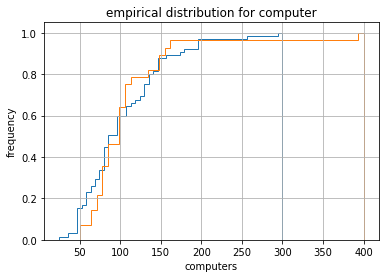

In [176]:
cafe_scale[cafe_scale['city']==1]['Computers'].hist(bins=50,normed=True,histtype='step',cumulative=True)
cafe_scale[cafe_scale['city']==2]['Computers'].hist(bins=50,normed=True,histtype='step',cumulative=True)
plt.xlabel('computers')
plt.ylabel('frequency')
plt.title('empirical distribution for computer')
plt.show()

### 7.3.3 成对（匹配）样本中位数的检验

In [177]:
stats.wilcoxon(happiness['Year2015'],happiness['Year2016'])  #样本点符号秩检验

WilcoxonResult(statistic=9660.5, pvalue=0.6346041550198774)

### 7.3.4 两样本的游程检验

两样本数据的游程检验主要检验两个样本数据是否来自于同一个分部，主要使用wald-wolfowitz 游程检验方法

In [178]:
sm.stats.runstest_2samp(np.asarray(runs['economics']).astype('float64')
                        np.asarray(runs['statistics']).astype('float64'))

SyntaxError: invalid syntax (<ipython-input-178-29db91e9faee>, line 2)

In [179]:
path="D:/data/Python_data/ch7/runs2.csv"
runs2=pd.read_csv(path)
runs2.head()

,score,group
0,66,0
1,77,0
2,72,1
3,60,1
4,65,1


In [180]:
sm.stats.runstest_2samp(np.asarray(runs2['score']).astype('float64'),
                        groups=np.asarray(runs2['group']))

ties detected


(-9.288960762896162, 1.558020813536555e-20)

## 7.4 多样本的非参数检验

对于来自多个总体的样本数据，同样可以利用非参数检验的方法来检验他们之间的差异

### 7.4.1 多个样本的分布检验

In [181]:
path="D:/data/Python_data/ch7/ksampledis.csv"
ksampledis=pd.read_csv(path)
ksampledis.head()

,statistics_score,class
0,91,2
1,95,3
2,75,1
3,52,3
4,57,2


In [182]:
G=ksampledis['class'].unique()
args=[]
for i in list(G):
    args.append(np.array(ksampledis[ksampledis['class']==i]['statistics_score']))

In [183]:
stats.anderson_ksamp(args)

Anderson_ksampResult(statistic=0.5632008353358472, critical_values=array([0.44925884, 1.3052767 , 1.9434184 , 2.57696569, 3.41634856]), significance_level=0.22153444857207932)

### 7.4.2 独立样本位置的检验

In [184]:
path="D:/data/Python_data/ch7/drinks.csv"
drinks=pd.read_csv(path)
drinks.head()

,season,terminal_no,Sales
0,1,1,98.96
1,2,1,88.97
2,3,1,88.55
3,4,1,84.34
4,1,2,94.43


In [185]:
drinks['season']=drinks['season'].astype('category')
drinks['season'].cat.categories=['春','夏','秋','冬']
drinks['season'].cat.set_categories=['春','夏','秋','冬']
G=drinks['season'].unique()
args=[]
for i in list(G):
    args.append(drinks[drinks['season']==i]['Sales'])

In [186]:
stats.kruskal(*args)

KruskalResult(statistic=23.95945806717496, pvalue=2.5471577250553795e-05)

In [187]:
stats.median_test(*args)

(26.0, 9.537406942615968e-06, 90.82, array([[10, 14,  8,  0],
        [ 6,  2,  8, 16]], dtype=int64))

In [188]:
from statsmodels.sandbox.stats.runs import median_test_ksample
median_test_ksample(drinks['Sales'],drinks['season'])

(Power_divergenceResult(statistic=26.0, pvalue=0.00022264244658763393),
 array([[16,  2,  6,  8],
        [ 0, 14, 10,  8]]),
 array([[8., 8., 8., 8.],
        [8., 8., 8., 8.]]))

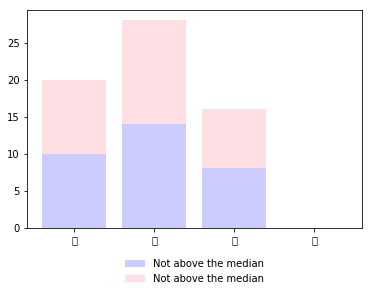

In [189]:
above_median=[]
below_median=[]
for i in list(G):
    above_median.append((drinks[drinks['season']==i]['Sales']>drinks['Sales'].median()).sum())
    below_median.append((drinks[drinks['season']==i]['Sales']>drinks['Sales'].median()).sum())
plt.bar(range(4),below_median,color='b',alpha=.2,label='Not above the median',align='center')
plt.bar(range(4),below_median,color='pink',alpha=.5,label='Not above the median',bottom=below_median)
plt.legend(loc='lower center',frameon=False,bbox_to_anchor=(0.5,-0.3))
plt.xticks(range(4),G)
plt.show()  #可明显的展示出销售量到底在那个季度有差异，及之间有多大差异

# 第八章 相关分析与关联分析

## 8.1 相关分析

相关分析主要分析两个变量之间的相互依存关系

In [190]:
path="D:/data/Python_data/ch8/car_corr.csv"
car_corr=pd.read_csv(path)
car_corr.head()

,Brand_Model,Weight,Circle,Max_Speed,Horsepower
0,Acura Legend V6,3265,42,163,160
1,Audi 100,2935,39,141,130
2,BMW 535i,3640,39,209,208
3,Buick Century,2880,41,151,110
4,Buick Riviera V6,3465,41,231,165


用numpy中的corrcoef函数计算样本相关性分析

In [191]:
np.corrcoef((car_corr['Weight'],car_corr['Circle'],car_corr['Max_Speed'],car_corr['Horsepower'])) 

array([[ 1.        ,  0.07548513,  0.85458981,  0.82559164],
       [ 0.07548513,  1.        ,  0.26369327, -0.02829931],
       [ 0.85458981,  0.26369327,  1.        ,  0.75015192],
       [ 0.82559164, -0.02829931,  0.75015192,  1.        ]])

In [192]:
car_corr.corr()  #corr方法可以自动识别DataFrame 对象中的数值型数据

,Weight,Circle,Max_Speed,Horsepower
Weight,1.000000,0.075485,0.854590,0.825592
Circle,0.075485,1.000000,0.263693,-0.028299
Max_Speed,0.854590,0.263693,1.000000,0.750152
Horsepower,0.825592,-0.028299,0.750152,1.000000


In [193]:
stats.pearsonr(car_corr['Max_Speed'],car_corr['Weight'])  #使用scipy提供的相关系数函数，检验max_speed和weight之间的相关系数

(0.8545898074815489, 1.8591897095041325e-09)

In [194]:
correlation=[]  
for i in car_corr[['Weight','Circle','Horsepower']].columns:
    correlation.append(stats.pearsonr(car_corr['Max_Speed'],car_corr[i]))
    
correlation  #stats.pearsonr 可以计算两组数据的相关系数及其显著性

[(0.8545898074815489, 1.8591897095041325e-09),
 (0.2636932690716119, 0.15913089371709196),
 (0.7501519209192844, 1.8164321769966701e-06)]

In [195]:
from sklearn.feature_selection import f_regression
F,P_Value=f_regression(car_corr[['Weight','Circle','Horsepower']],car_corr['Max_Speed'])
print P_Value     #主要用于机器学习的scikit-learn包提供的f_regrssion方法 可以直接计算出多个变量之间相关性检验的p值

[1.85918971e-09 1.59130894e-01 1.81643218e-06]


### 8.1.3 偏相关分析

剔除其他变量之后再进行相关分析的方法

In [196]:
def partial_corr(x,y,partial=[]):
    #参数x和y分别为考察相关关系的变量，partial为控制变量
    xy,xyp=stats.pearsonr(x,y)
    xp,xpp=stats.pearsonr(x,partial)
    yp,ypp=stats.pearsonr(y,partial)
    n=len(x)
    df=n-3
    r=(xy-xp*yp)/(np.sqrt(1-xp*xp)*np.sqrt(1-yp*yp))
    if abs(r)==1.0:
        prob=0.0
    else:
        t=(r*np.sqrt(df))/np.sqrt(1-r*r)
        prob=(1-stats.t.cdf(abs(t),df))*2
    return r,prob

In [197]:
pcorrelation=[]  #用上述函数计算控制住马力变量之后其他变量之间的偏相关系数及其显著性水平
for i in car_corr[['Weight','Circle']].columns:
    pcorrelation.append(partial_corr(car_corr[i],car_corr['Max_Speed'],partial=car_corr['Horsepower']))

pcorrelation

[(0.6305309485292881, 0.00024594990184656496),
 (0.43104653010728905, 0.019570366951637608)]

### 8.1.4 点二列相关分析

点二列相关分析适用于两个变量中一个是来自正态总体的定距或定比数据

In [198]:
path="D:/data/Python_data/ch8/scorebygender.csv"
scorebygender=pd.read_csv(path)
scorebygender.head()

,score,gender
0,68,1
1,81,1
2,78,0
3,91,0
4,91,1


In [199]:
stats.pointbiserialr(scorebygender['gender'],scorebygender['score'])
#计算该相关系数及其显著性水平

PointbiserialrResult(correlation=0.013517390176463265, pvalue=0.8777414982748971)

### 8.1.5 非参数相关分析

In [200]:
path="D:/data/Python_data/ch8/graduate.csv"
graduate=pd.read_csv(path)
graduate.head()

,Interest,Major,Teaching,Tutor
0,2,2,2,2
1,2,2,1,2
2,4,3,4,4
3,1,1,2,1
4,3,3,3,3


In [201]:
rho,p=stats.spearmanr(graduate)  #该函数返回两个值，分别为相关系数和显著性检验p值
print rho
print p

[[1.         0.72134588 0.27430442 0.8062982 ]
 [0.72134588 1.         0.28790361 0.73184305]
 [0.27430442 0.28790361 1.         0.28440269]
 [0.8062982  0.73184305 0.28440269 1.        ]]
[[0.00000000e+000 2.58589179e-163 6.31375185e-019 1.49316919e-232]
 [2.58589179e-163 0.00000000e+000 9.09876371e-021 2.08047486e-170]
 [6.31375185e-019 9.09876371e-021 0.00000000e+000 2.77199934e-020]
 [1.49316919e-232 2.08047486e-170 2.77199934e-020 0.00000000e+000]]


In [202]:
kt=[]
for i in graduate[['Interest','Major','Teaching']].columns:
    kt.append(stats.kendalltau(graduate[i],graduate['Tutor']))
kt

[KendalltauResult(correlation=0.7764436113158888, pvalue=3.906585846189082e-182),
 KendalltauResult(correlation=0.679802586117344, pvalue=9.988471538085373e-140),
 KendalltauResult(correlation=0.2505554510047037, pvalue=3.3733693453210805e-20)]

## 8.2 关联分析

关联分析常用于发现大量数据中有异议的联系，这种联系强调的是产生数据的行为之间的联系

In [203]:
path="D:/data/Python_data/ch8/Association.csv"
aa=pd.read_csv(path,encoding='gbk')
aa.index=range(1,6)
aa

,TID,项集
1,1,{面包，牛奶}
2,2,{面包，尿布，啤酒，鸡蛋}
3,3,{牛奶，尿布，啤酒，可乐}
4,4,{面包，牛奶，尿布，啤酒}
5,5,{面包，牛奶，尿布，可乐}


In [204]:
from random import randint
path="D:/data/Python_data/ch8/mpb.csv"
mpb=pd.read_csv(path)
mpb.ix[[randint(0,98371) for _ in range(10)]]

D:\study_apps\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,news,email,callreminder
19540,0,1,0
14515,0,1,0
31865,0,1,0
50883,0,1,0
56205,0,1,0
42627,1,1,0
80493,1,1,0
73887,1,1,0
71988,1,0,0
12040,1,1,0


In [205]:
path=="D:/data/Python_data/ch8/mpb.basket"
a=pd.read_table(path)
a.ix[[randint(0,98371) for _ in range(10)]]

D:\study_apps\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,"news,email,callreminder"
66983,"0,1,0"
96675,"1,1,0"
66252,"0,1,0"
12387,"0,1,0"
19637,"1,1,0"
11525,"0,1,0"
68069,"0,1,0"
17943,"0,1,0"
57055,"0,1,0"
40435,"0,1,0"


In [206]:
path="D:/data/Python_data/ch8/mpb_fpgrowth.csv"     #FP-growth算法
mpb_fpg=pd.read_csv(path)
mpb_fpg.ix[[randint(0,98371) for _ in range(10)]]

D:\study_apps\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,new,email,callreminder
30866,NaN,email,NaN
92320,new,email,NaN
77002,NaN,NaN,callreminder
4300,new,email,NaN
80684,new,NaN,callreminder
78782,NaN,email,NaN
27329,new,email,NaN
45471,new,email,NaN
75788,new,email,NaN
1217,new,NaN,NaN


In [207]:
#from fp_growth import find_frequent_itemsets as ffi

# 第九章 回归分析

## 9.1 线性回归

In [208]:
path="D:/data/Python_data/ch9/murder.csv"
murder=pd.read_csv(path)
murder.head()

,region,illiteracy,murder
0,4,0.5,11.5
1,8,0.5,2.3
2,8,0.5,1.7
3,4,0.6,5.3
4,4,0.6,5.0


In [209]:
murder['region']=murder['region'].astype('category')
murder['region'].cat.categories=['East North Central','East South Central','Middle Atlantic','Mountain','New England','Pacific','South Atlantic',
                                 'West North Central','West South Central']
murder['region'].cat.set_categories=['East North Central','East South Central','Middle Atlantic','Mountain','New England','Pacific','South Atlantic',
                                 'West North Central','West South Central']

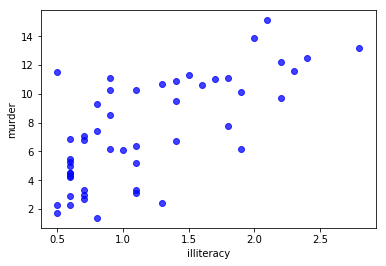

In [210]:
plt.scatter(murder['illiteracy'],murder['murder'],c='blue',alpha=0.75)
plt.xlabel('illiteracy')
plt.ylabel('murder')
plt.show()  #绘制散点图

In [211]:
murder_model1=stats.linregress(murder['illiteracy'],murder['murder'])  #该函数自变量在前，因变量在后
print murder_model1
print 'r_square: %.5f' % murder_model1.rvalue**2

LinregressResult(slope=4.257456742653117, intercept=2.396775611095853, rvalue=0.7029751986841699, pvalue=1.2579116392501817e-08, stderr=0.6217132752343032)
r_square: 0.49417


In [212]:
from statsmodels.formula.api import ols
formula='murder~illiteracy'
murder_model2=ols(formula,data=murder).fit()
murder_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.484   
Dependent Variable: murder           AIC:                241.4099
Date:               2018-06-03 20:08 BIC:                245.2340
No. Observations:   50               Log-Likelihood:     -118.70 
Df Model:           1                F-statistic:        46.89   
Df Residuals:       48               Prob (F-statistic): 1.26e-08
R-squared:          0.494            Scale:              7.0367  
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     2.3968     0.8184   2.9285   0.0052   0.7512   4.0424
illiteracy    4.2575     0.6217   6.8479   0.0000   3.0074   5.5075
-----------------------------------------------------------------
Omnibus:              0.452        Durbin-Watson:           2.000
Prob(Omnibus):        0.798        Jarque-Bera (JB):        0.452
Skew:                 0.210        Prob(JB):                0.798
Kurtosis:             2.797        Condition No.:           4    
=================================================================

"""

In [213]:
from statsmodels.formula.api import OLS
x=murder['illiteracy']
x=sm.add_constant(x)
'''
构建模型的自变量数组，该数组包含截距
'''
y=murder['murder']
murder_model3=OLS(y,x).fit()
'''
ols是一个类
'''
murder_model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.484   
Dependent Variable: murder           AIC:                241.4099
Date:               2018-06-03 20:08 BIC:                245.2340
No. Observations:   50               Log-Likelihood:     -118.70 
Df Model:           1                F-statistic:        46.89   
Df Residuals:       48               Prob (F-statistic): 1.26e-08
R-squared:          0.494            Scale:              7.0367  
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const         2.3968     0.8184   2.9285   0.0052   0.7512   4.0424
illiteracy    4.2575     0.6217   6.8479   0.0000   3.0074   5.5075
-----------------------------------------------------------------
Omnibus:              0.452        Durbin-Watson:           2.000
Prob(Omnibus):        0.798        Jarque-Bera (JB):        0.452
Skew:                 0.210        Prob(JB):                0.798
Kurtosis:             2.797        Condition No.:           4    
=================================================================

"""

In [214]:
sm.stats.diagnostic.linear_rainbow(murder_model2)  #回归方程总体显著性检验

(0.6152086826947937, 0.8811091720318107)

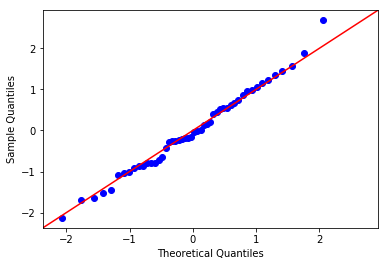

In [215]:
sm.qqplot(murder_model2.resid,fit=True,line='45')  #绘制残差Q-Q图
plt.show()

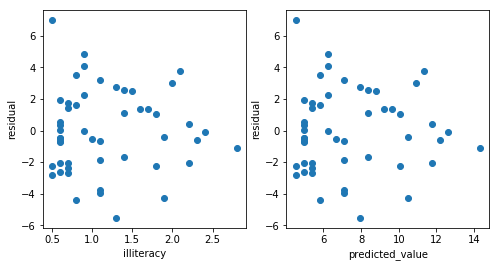

In [228]:
fig=plt.gcf()
fig.set_size_inches(8,4)
plt.subplot(121)
plt.plot(murder['illiteracy'],murder_model2.resid,'o')
plt.xlabel('illiteracy')
plt.ylabel('residual')
plt.subplot(122)
plt.plot(murder_model2.fittedvalues,murder_model2.resid,'o')
plt.xlabel('predicted_value')
plt.ylabel('residual')
plt.show()

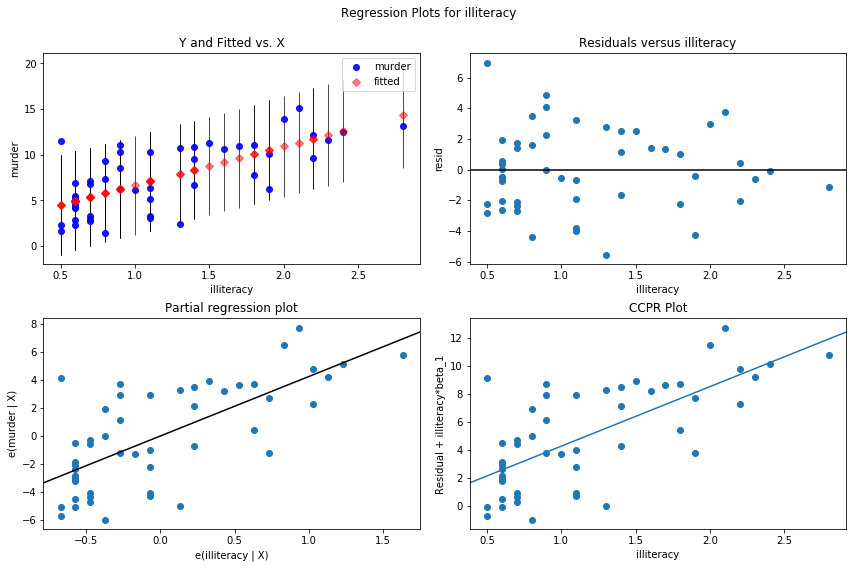

In [232]:
fig=plt.figure(figsize=(12,8))
from statsmodels.graphics.regressionplots import plot_regress_exog
plot_regress_exog(murder_model2,1,fig=fig)  #第二个参数是指模型中的第几个自变量，第三个参数fig表示指定的对象上绘图
plt.show()

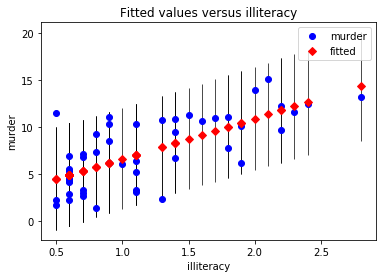

In [234]:
from statsmodels.graphics.regressionplots import plot_fit
plot_fit(murder_model2,1)  #第二个参数是指模型中的第几个变量
plt.show()

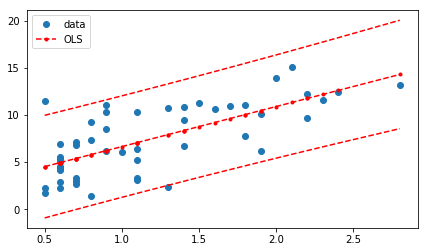

In [235]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd,interval_l,interval_u=wls_prediction_std(murder_model2,alpha=0.05)
fig=plt.subplots(figsize=(7,4))
plt.plot(murder['illiteracy'],murder['murder'],'o',label='data')
plt.plot(murder['illiteracy'],murder_model2.fittedvalues,'r--.',label='OLS')
plt.plot(murder['illiteracy'],interval_u,'r--')
plt.plot(murder['illiteracy'],interval_l,'r--')
plt.legend(loc='best');
plt.show()  #绘制集合区县和因变量预测置信区间

In [239]:
path="D:/data/Python_data/ch9/salary_r.csv"
salary=pd.read_csv(path)
salary=salary.dropna(axis=0)
salary.head()

,position,ID,Gender,Education,Current_Salary,Begin_Salary,Experience,Age
0,1,1,1,15,57000,27000,144.0,55.0
1,1,34,1,19,92000,39990,175.0,58.0
2,1,18,1,16,103750,27510,70.0,51.0
3,1,200,1,17,67500,34980,9.0,44.0
4,1,199,1,16,51250,27480,69.0,49.0


In [241]:
salary['position_valueabel']=salary['position']
salary['Gender_valueabel']=salary['Gender']
salary['position_valueabel']=salary['position_valueabel'].astype('category')
salary['position_valueabel'].cat.categories=['经理','主管','普通员工']
salary['position_valueabel'].cat.set_categories=['经理','主管','普通员工']
salary['Gender_valueabel']=salary['Gender_valueabel'].astype('category')
salary['Gender_valueabel'].cat.categories=['女','男']
salary['Gender_valueabel'].cat.set_categories=['女','男']

In [243]:
formula='Current_Salary~Education+Begin_Salary+Experience+Age'  #使用statsmodels提供的ols进行建模
salary_model1=ols(formula,data=salary).fit()
salary_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.781     
Dependent Variable: Current_Salary   AIC:                9243.8648 
Date:               2018-06-03 20:35 BIC:                9264.3664 
No. Observations:   446              Log-Likelihood:     -4616.9   
Df Model:           4                F-statistic:        398.8     
Df Residuals:       441              Prob (F-statistic): 5.53e-145 
R-squared:          0.783            Scale:              5.8068e+07
-------------------------------------------------------------------
              Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------------------------------------------------
Intercept    703.3118 3147.8045  0.2234 0.8233 -5483.2503 6889.8740
Education    490.5022  180.7222  2.7141 0.0069   135.3185  845.6860
Begin_Salary   1.8936    0.0722 26.2203 0.0000     1.7517    2.0356
Experience   -11.6277    5.9764 -1.9456 0.0523   -23.3735    0.1182
Age          -74.9263   53.2311 -1.4076 0.1600  -179.5445   29.6918
-------------------------------------------------------------------
Omnibus:             194.312       Durbin-Watson:          1.887   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       1481.311
Skew:                1.695         Prob(JB):               0.000   
Kurtosis:            11.259        Condition No.:          160242  
===================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [249]:
formula='Current_Salary~Education+Begin_Salary+Experience-Age'  #对于回归系数不显著的变量应当在模型中剔除
salary_model2=ols(formula,data=salary).fit()
print salary_model2.summary2()

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.781     
Dependent Variable:   Current_Salary   AIC:                9243.8641 
Date:                 2018-06-03 20:41 BIC:                9260.2653 
No. Observations:     446              Log-Likelihood:     -4617.9   
Df Model:             3                F-statistic:        529.9     
Df Residuals:         442              Prob (F-statistic): 5.93e-146 
R-squared:            0.782            Scale:              5.8197e+07
---------------------------------------------------------------------
               Coef.     Std.Err.    t    P>|t|    [0.025     0.975] 
---------------------------------------------------------------------
Intercept    -2708.6776 2010.3943 -1.3473 0.1786 -6659.7972 1242.4419
Education      512.4963  180.2451  2.8433 0.0047   158.2523  866.7403
Begin_Salary     1.8939    0.0723 26.1949 0.0000     1.7518    2.0360
Experience     -18.2230    3.7139 -4.90

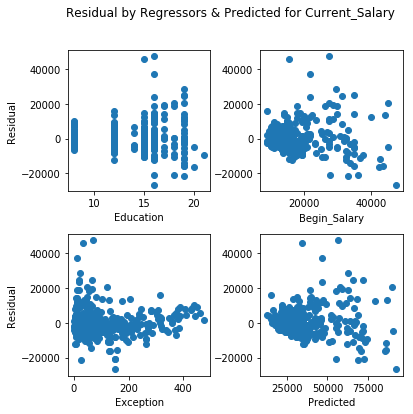

In [252]:
fig=plt.gcf()
fig.suptitle('Residual by Regressors & Predicted for Current_Salary')
fig.set_size_inches(6,6)
plt.subplot(221)
plt.plot(salary['Education'],salary_model2.resid,'o')
plt.xlabel('Education')
plt.ylabel('Residual')
plt.subplot(222)
plt.plot(salary['Begin_Salary'],salary_model2.resid,'o')
plt.xlabel('Begin_Salary')
plt.subplot(223)
plt.plot(salary['Experience'],salary_model2.resid,'o')
plt.xlabel('Exception')
plt.ylabel('Residual')
plt.subplot(224)
plt.plot(salary_model2.fittedvalues,salary_model2.resid,'o')
plt.xlabel('Predicted')
plt.subplots_adjust(hspace=0.3,wspace=0.35)
plt.show()

In [254]:
from sklearn import linear_model  #多元线性回归
salary_model3=linear_model.LinearRegression()
salary_model3.fit(salary[['Education','Begin_Salary','Experience']],salary['Current_Salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [255]:
print 'intercept: %.6f,coefficients: %s'   %(salary_model3.intercept_,salary_model3.coef_)

intercept: -2708.677631,coefficients: [512.4962845    1.89389266 -18.22300788]


In [256]:
from patsy.contrasts import Treatment
contrasts=Treatment(reference=3).code_without_intercept([1,2,3])
# 列表中的数字是分类变量的属性以数字来对应表示
print contrasts

ContrastMatrix(array([[1., 0.],
                      [0., 1.],
                      [0., 0.]]), ['[T.1]', '[T.2]'])


In [259]:
formula='Current_Salary~Education+Begin_Salary+Experience-Age+C(position,Treatment(reference=3))+C(Gender)'
salary_model4=ols(formula,data=salary).fit()
print salary_model4.summary2()

                                  Results: Ordinary least squares
Model:                         OLS                        Adj. R-squared:               0.813     
Dependent Variable:            Current_Salary             AIC:                          9175.9545 
Date:                          2018-06-03 21:00           BIC:                          9204.6567 
No. Observations:              446                        Log-Likelihood:               -4581.0   
Df Model:                      6                          F-statistic:                  323.8     
Df Residuals:                  439                        Prob (F-statistic):           1.02e-157 
R-squared:                     0.816                      Scale:                        4.9647e+07
--------------------------------------------------------------------------------------------------
                                            Coef.     Std.Err.    t    P>|t|    [0.025    0.975]  
-------------------------------------------

In [269]:
salary.loc[(salary.position_valueabel=='jl'),'position1']=1  #直接赋值
salary.loc[(salary.position_valueabel=='jl'),'position2']=0
salary.loc[(salary.position_valueabel=='zg'),'position1']=0
salary.loc[(salary.position_valueabel=='zg'),'position2']=1
salary.loc[(salary.position_valueabel=='yg'),'position1']=0
salary.loc[(salary.position_valueabel=='yg'),'position2']=0
salary.head()

,position,ID,Gender,Education,Current_Salary,Begin_Salary,Experience,Age,position_valueabel,Gender_valueabel,position1,position2,position__经理,position__主管,position__普通员工
0,1,1,1,15,57000,27000,144.0,55.0,经理,男,1.0,0.0,1,0,0
1,1,34,1,19,92000,39990,175.0,58.0,经理,男,1.0,0.0,1,0,0
2,1,18,1,16,103750,27510,70.0,51.0,经理,男,1.0,0.0,1,0,0
3,1,200,1,17,67500,34980,9.0,44.0,经理,男,1.0,0.0,1,0,0
4,1,199,1,16,51250,27480,69.0,49.0,经理,男,1.0,0.0,1,0,0


In [267]:
dm=pd.get_dummies(salary['position_valueabel'],prefix='position_')  #将指定变量处理为虚拟变量

In [270]:
formula='Current_Salary~Education+Begin_Salary+Experience-Age+position1+position2+Gender'
salary_model5=ols(formula,data=salary).fit()
print salary_model5.summary2()

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.813     
Dependent Variable:   Current_Salary   AIC:                9175.9545 
Date:                 2018-06-03 21:12 BIC:                9204.6567 
No. Observations:     446              Log-Likelihood:     -4581.0   
Df Model:             6                F-statistic:        323.8     
Df Residuals:         439              Prob (F-statistic): 1.02e-157 
R-squared:            0.816            Scale:              4.9647e+07
---------------------------------------------------------------------
               Coef.     Std.Err.    t    P>|t|    [0.025    0.975]  
---------------------------------------------------------------------
Intercept     3908.9330 2155.2003  1.8137 0.0704 -326.8598  8144.7258
Education      506.7274  172.5026  2.9375 0.0035  167.6939   845.7609
Begin_Salary     1.3221    0.0988 13.3870 0.0000    1.1280     1.5162
Experience     -22.5668    3.7782 -5.97

## 9.2 非线性回归

### 9.2.1 可线性化的非线性分析

In [271]:
path="D:/data/Python_data/ch9/electronic_business.csv"
eb=pd.read_csv(path)
eb.head()

,registration,sales
0,16.9,67.5
1,15.3,88.3
2,4.5,77.4
3,14.7,84.6
4,4.0,77.2


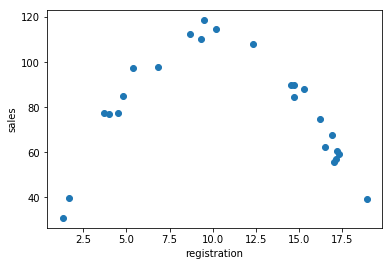

In [272]:
plt.scatter(eb.registration,eb.sales,marker='o')
plt.xlabel('registration')
plt.ylabel('sales')
plt.show()

In [277]:
formula='sales~registration+np.square(registration)'  #对变量进行转换，并拟合出线性模型
eb_model=ols(formula,data=eb).fit()
print eb_model.summary2()

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.968   
Dependent Variable:    sales              AIC:                  148.0375
Date:                  2018-06-03 21:17   BIC:                  151.6942
No. Observations:      25                 Log-Likelihood:       -71.019 
Df Model:              2                  F-statistic:          360.7   
Df Residuals:          22                 Prob (F-statistic):   1.53e-17
R-squared:             0.970              Scale:                19.520  
------------------------------------------------------------------------
                         Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                9.1189   3.4492   2.6437 0.0148  1.9656 16.2721
registration            20.7981   0.8147  25.5296 0.0000 19.1086 22.4876
np.square(registration) -1.0394   0.0390 -26.6602 0.0000 -1.1202 -0.958

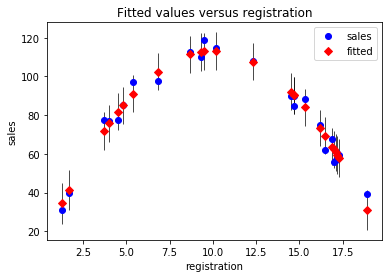

In [282]:
plot_fit(eb_model,1)
plt.show()

### 9.2.2 非线性回归模型

In [283]:
path="D:/data/Python_data/ch9/eb_extended.csv"
eb_ex=pd.read_csv(path)
eb_ex.head()

,registration,sales
0,16.9,67.5
1,15.3,88.3
2,4.5,77.4
3,14.7,84.6
4,4.0,77.2


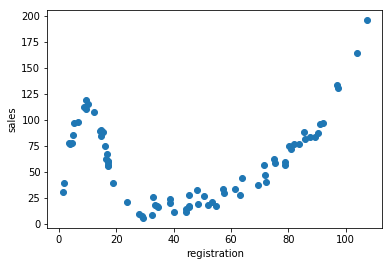

In [284]:
plt.scatter(eb_ex.registration,eb_ex.sales,marker='o')
plt.xlabel('registration')
plt.ylabel('sales')
plt.show()

In [285]:
from scipy.optimize import curve_fit
def func1(x,alpha2,beta3,gamma):
    return alpha2*(gamma**(beta3*x))
def func2(x,alpha1,beta1,beta2):
    return alpha1+beta1*x+beta2*np.square(x)

In [286]:
m1=curve_fit(func1,eb_ex[eb_ex['registration']>20]['registration'],eb_ex[eb_ex['registration']>20]['sales'])
m2=curve_fit(func2,eb_ex[eb_ex['registration']<=20]['registration'],eb_ex[eb_ex['registration']<=20]['sales'])

In [287]:
m1,m2

((array([3.34579554, 1.27953846, 1.0296989 ]),
  array([[ 9.56193825e-01, -1.40949294e+05,  3.31962319e+03],
         [-1.40949295e+05,  2.32282100e+10, -5.47068442e+08],
         [ 3.31962321e+03, -5.47068442e+08,  1.28845003e+07]])),
 (array([ 9.11887122, 20.79806299, -1.03935516]),
  array([[ 1.18971759e+01, -2.54291948e+00,  1.10578766e-01],
         [-2.54291948e+00,  6.63677073e-01, -3.11621801e-02],
         [ 1.10578766e-01, -3.11621801e-02,  1.51985540e-03]])))

In [288]:
eb_ex.loc[eb_ex['registration']>20,'predicted']=func1(eb_ex[eb_ex['registration']>20]['registration'],m1[0][0],m1[0][1],m1[0][2])
eb_ex.loc[eb_ex['registration']<=20,'predicted']=func2(eb_ex[eb_ex['registration']<=20]['registration'],m2[0][0],m2[0][1],m2[0][2])


D:\study_apps\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


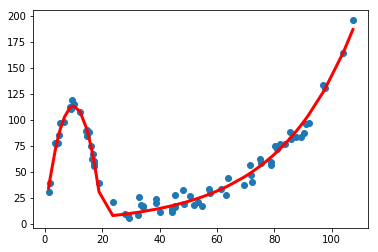

In [290]:
eb_ex_sorted=eb_ex.sort_index(by='registration')
plt.plot(eb_ex_sorted['registration'],eb_ex_sorted['sales'],'o',eb_ex_sorted['registration'],eb_ex_sorted['predicted'],'r-',lw=3)
plt.show()

## 9.3多项式回归

In [291]:
path="D:/data/Python_data/ch9/lorenz.csv"
lorenz=pd.read_csv(path)
lorenz.head()

,cpop,cincome
0,0.018,0.000000e+00
1,0.019,9.701260e-07
2,0.020,3.366135e-06
3,0.020,5.785387e-06
4,0.021,8.521446e-06


In [304]:
lorenz_est=np.polyfit(lorenz['cpop'],lorenz['cincome'],2)  #三个参数分别是自变量 因变量 阶数
lorenz_est

array([ 1.02722918, -0.20824691,  0.02550764])

In [305]:
lorenz_poly=np.poly1d(lorenz_est)
print lorenz_poly

       2
1.027 x - 0.2082 x + 0.02551


In [307]:
formula='cincome~cpop+np.square(cpop)'
lorenz_model1=ols(formula,data=lorenz).fit()
print lorenz_model1.summary2()

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.994     
Dependent Variable: cincome          AIC:                -6659.2479
Date:               2018-06-03 21:45 BIC:                -6643.6872
No. Observations:   1322             Log-Likelihood:     3332.6    
Df Model:           2                F-statistic:        1.105e+05 
Df Residuals:       1319             Prob (F-statistic): 0.00      
R-squared:          0.994            Scale:              0.00037922
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           0.0255   0.0017  14.9508 0.0000  0.0222  0.0289
cpop               -0.2082   0.0077 -26.9092 0.0000 -0.2234 -0.1931
np.square(cpop)     1.0272   0.0074 139.4493 0.0000  1.0128  1.0417
------------------------------------------------------------------

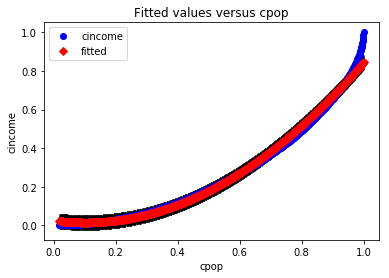

In [308]:
plot_fit(lorenz_model1,1)
plt.show()

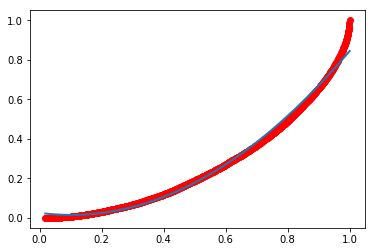

In [309]:
plt.plot(lorenz['cpop'],lorenz['cincome'],'ro',lorenz['cpop'],lorenz_model1.fittedvalues,linewidth=2)

In [310]:
#ols函数建立模型时的变量不能使用表达式做变换，只能采用函数的方式进行变换
def cube(x):
    return x**3

formula='cincome~cpop+np.square(cpop)+cube(cpop)'
lorenz_model2=ols(formula,data=lorenz).fit()
print lorenz_model2.summary2()

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998     
Dependent Variable: cincome          AIC:                -7995.1774
Date:               2018-06-03 21:49 BIC:                -7974.4298
No. Observations:   1322             Log-Likelihood:     4001.6    
Df Model:           3                F-statistic:        2.034e+05 
Df Residuals:       1318             Prob (F-statistic): 0.00      
R-squared:          0.998            Scale:              0.00013794
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -0.0238   0.0015 -16.4017 0.0000 -0.0267 -0.0210
cpop                0.3350   0.0122  27.3831 0.0000  0.3110  0.3589
np.square(cpop)    -0.2877   0.0277 -10.3769 0.0000 -0.3421 -0.2333
cube(cpop)          0.8611   0.0179  48.0430 0.0000  0.8259  0.896

## 9.4 分位数回归

In [311]:
from statsmodels.formula.api import quantreg
formula='Current_Salary~Begin_Salary+Education+Experience'
salary_qt=quantreg(formula,data=salary)
salary_qtmodel1=salary_qt.fit(q=0.1)  #参数q表示分位点，本程序给出10%分位点上的模型拟合结果
print salary_qtmodel1.summary()

                         QuantReg Regression Results                          
Dep. Variable:         Current_Salary   Pseudo R-squared:               0.4469
Model:                       QuantReg   Bandwidth:                       3076.
Method:                 Least Squares   Sparsity:                    1.720e+04
Date:                Sun, 03 Jun 2018   No. Observations:                  446
Time:                        21:52:23   Df Residuals:                      442
                                        Df Model:                            3
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       86.9399   1443.740      0.060      0.952   -2750.509    2924.388
Begin_Salary     1.4572      0.056     25.875      0.000       1.347       1.568
Education      298.0171    133.791      2.227      0.026      35.072     560.962
Experience     -13.3543      2.287     -5.

In [312]:
salary_qtmodel2=salary_qt.fit(q=0.85)  #在0.85分位点下的模型估计
print salary_qtmodel2.summary()

                         QuantReg Regression Results                          
Dep. Variable:         Current_Salary   Pseudo R-squared:               0.6465
Model:                       QuantReg   Bandwidth:                       3103.
Method:                 Least Squares   Sparsity:                    2.767e+04
Date:                Sun, 03 Jun 2018   No. Observations:                  446
Time:                        22:04:52   Df Residuals:                      442
                                        Df Model:                            3
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5684.6771   2716.874     -2.092      0.037    -1.1e+04    -345.082
Begin_Salary     2.4948      0.082     30.530      0.000       2.334       2.655
Education      440.0576    241.952      1.819      0.070     -35.461     915.576
Experience     -12.9493      5.476     -2.

In [316]:
import warnings
warnings.filterwarnings('ignore')
quantiles=np.arange(0.05,1,0.05)
def fit_model(v,q):
    res=salary_qt.fit(q=q)
    return [q,res.params['Intercept'],res.params[v]]+res.conf_int(alpha=0.05).ix[v].tolist()

names=locals()
for i in ['Intercept','Begin_Salary','Education','Experience']:
    names['params_%s' % i]=[fit_model(i,x) for x in quantiles]
    names['params_%s' % i]=pd.DataFrame(names['params_%s' % i],columns=['quantile','Intercept','Beta','Beta_L','Beta_U'])

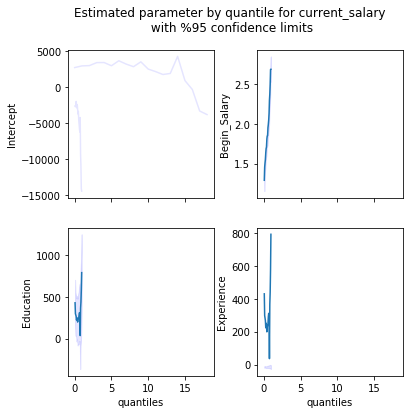

In [322]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True)
fig.set_size_inches(6,6)
fig.suptitle('Estimated parameter by quantile for current_salary\n with %95 confidence limits')
ax1.plot(params_Intercept['quantile'],params_Intercept['Beta_L'],params_Intercept['Beta_U'],color='b',alpha=0.1)
ax1.set_ylabel('Intercept')

ax2.plot(params_Begin_Salary['quantile'],params_Begin_Salary['Beta'])
ax2.fill_between(params_Begin_Salary['quantile'],params_Begin_Salary['Beta_L'],params_Begin_Salary['Beta_U'],color='b',alpha=0.1)
ax2.set_ylabel('Begin_Salary')

ax3.plot(params_Education['quantile'],params_Education['Beta'])
ax3.fill_between(params_Education['quantile'],params_Education['Beta_L'],params_Education['Beta_U'],color='b',alpha=0.1)
ax3.set_xlabel('quantiles')
ax3.set_ylabel('Education')

ax4.plot(params_Education['quantile'],params_Education['Beta'])
ax4.fill_between(params_Experience['quantile'],params_Experience['Beta_L'],params_Experience['Beta_U'],color='b',alpha=0.1)
ax4.set_xlabel('quantiles')
ax4.set_ylabel('Experience')

fig.subplots_adjust(wspace=0.3)
plt.show()